In [43]:
month_31 = ['Jan', 'Mar', 'May', 'Jul', 'Aug', 'Oct', 'Dec']
month_30 = ['Apr', 'Jun', 'Sep', 'Nov']
month_29 = ['Feb']
links = []
for j in month_31:
    for i in range(1,32):
        k = ("https://agmarknet.gov.in/SearchCmmMkt.aspx?Tx_Commodity=24&Tx_State=UP&Tx_District=1&Tx_Market=0&DateFrom={0}-{1}-2020&DateTo={0}-{1}-2020&Fr_Date={0}-{1}-2020&To_Date={0}-{1}-2020&Tx_Trend=0&Tx_CommodityHead=Potato&Tx_StateHead=Uttar+Pradesh&Tx_DistrictHead=Agra&Tx_MarketHead=--Select--".format(i, j))
        links.append(k)
for j in month_30:
    for i in range(1,31):
        k = ("https://agmarknet.gov.in/SearchCmmMkt.aspx?Tx_Commodity=24&Tx_State=UP&Tx_District=1&Tx_Market=0&DateFrom={0}-{1}-2020&DateTo={0}-{1}-2020&Fr_Date={0}-{1}-2020&To_Date={0}-{1}-2020&Tx_Trend=0&Tx_CommodityHead=Potato&Tx_StateHead=Uttar+Pradesh&Tx_DistrictHead=Agra&Tx_MarketHead=--Select--".format(i, j))
        links.append(k)
        
for j in month_29:
    for i in range(1,30):
        k = ("https://agmarknet.gov.in/SearchCmmMkt.aspx?Tx_Commodity=24&Tx_State=UP&Tx_District=1&Tx_Market=0&DateFrom={0}-{1}-2020&DateTo={0}-{1}-2020&Fr_Date={0}-{1}-2020&To_Date={0}-{1}-2020&Tx_Trend=0&Tx_CommodityHead=Potato&Tx_StateHead=Uttar+Pradesh&Tx_DistrictHead=Agra&Tx_MarketHead=--Select--".format(i, j))
        links.append(k)

In [52]:
import requests
import pandas as pd
data = pd.DataFrame(columns = ['Sl no.', 'District Name', 'Market Name', 'Commodity', 'Variety', 'Grade', 'Min Price (Rs./Quintal)',
                        'Max Price (Rs./Quintal)','Modal Price (Rs./Quintal)', 'Price Date'])
for i in links:
    html = requests.get(i).content
    df_list = pd.read_html(html)
    df = pd.DataFrame(df_list[0])
    data = pd.concat([data, df], ignore_index=True)

data = data.drop(data.columns[10:], axis = 1)

In [62]:
data

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,1,Agra,Achnera,Potato,Desi,FAQ,1300,1400,1350,01 Jan 2020
1,2,Agra,Fatehpur Sikri,Potato,Local,FAQ,1400,1520,1455,01 Jan 2020
2,3,Agra,Jagnair,Potato,Desi,FAQ,1250,1350,1300,01 Jan 2020
3,4,Agra,Jarar,Potato,Desi,FAQ,1200,1300,1250,01 Jan 2020
4,5,Agra,Khairagarh,Potato,Desi,FAQ,1200,1300,1250,01 Jan 2020
...,...,...,...,...,...,...,...,...,...,...
1823,2,Agra,Fatehabad,Potato,Desi,FAQ,800,900,850,29 Feb 2020
1824,3,Agra,Fatehpur Sikri,Potato,Local,FAQ,800,950,890,29 Feb 2020
1825,4,Agra,Jagnair,Potato,Desi,FAQ,900,1000,950,29 Feb 2020
1826,5,Agra,Khairagarh,Potato,Desi,FAQ,900,1000,950,29 Feb 2020


In [77]:
data = data[~(data['Price Date'] == 'No Data Found')]

In [80]:
data['Price Date'] = pd.to_datetime(data["Price Date"]).dt.date

C:\Users\priya\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [73]:
data[['Min Price (Rs./Quintal)', 'Max Price (Rs./Quintal)','Modal Price (Rs./Quintal)']] = data[['Min Price (Rs./Quintal)', 'Max Price (Rs./Quintal)','Modal Price (Rs./Quintal)']].apply(pd.to_numeric)

In [67]:
data['Market Name'].value_counts()

Achnera           306
Fatehpur Sikri    290
Agra              285
Fatehabad         258
Jagnair           187
Khairagarh        187
Samsabad          168
Jarar             146
No Data Found       1
Name: Market Name, dtype: int64

In [74]:
markets = data.pivot_table(index='District Name', columns='Market Name', values="Modal Price (Rs./Quintal)", aggfunc='mean')
markets.head()
    

Market Name,Achnera,Agra,Fatehabad,Fatehpur Sikri,Jagnair,Jarar,Khairagarh,Samsabad
District Name,,,,,,,,
Agra,1695.212418,1716.614035,1385.387597,1737.344828,1311.71123,1072.671233,1233.68984,1141.517857


In [96]:
markets = data.pivot_table(index='Price Date', columns='Market Name', values="Modal Price (Rs./Quintal)", aggfunc='mean')
markets.head()

Market Name,Achnera,Agra,Fatehabad,Fatehpur Sikri,Jagnair,Jarar,Khairagarh,Samsabad
Price Date,,,,,,,,
2020-01-01,1350.0,NaN,NaN,1455.0,1300.0,1250.0,1250.0,1200.0
2020-01-02,NaN,1400.0,1200.0,1420.0,1300.0,1250.0,1250.0,1200.0
2020-01-03,1350.0,1380.0,1200.0,1435.0,1275.0,1240.0,1150.0,NaN
2020-01-04,1300.0,1310.0,1200.0,NaN,1250.0,NaN,1100.0,1200.0
2020-01-05,1320.0,NaN,NaN,NaN,1300.0,1250.0,1150.0,1100.0


In [100]:
markets = markets.fillna(method = 'backfill')

In [104]:
markets.tail(50)

Market Name,Achnera,Agra,Fatehabad,Fatehpur Sikri,Jagnair,Jarar,Khairagarh,Samsabad
Price Date,,,,,,,,
2020-11-12,2840.0,2840.0,1850.0,2815.0,2600.0,NaN,2900.0,NaN
2020-11-13,2840.0,2850.0,1950.0,2850.0,2600.0,NaN,2900.0,NaN
2020-11-14,2830.0,2880.0,1950.0,2875.0,2600.0,NaN,2900.0,NaN
2020-11-15,2830.0,2880.0,1950.0,2890.0,2600.0,NaN,2900.0,NaN
2020-11-16,2840.0,2880.0,1950.0,2890.0,2600.0,NaN,2900.0,NaN
2020-11-17,2840.0,2880.0,1950.0,2865.0,2600.0,NaN,2900.0,NaN
2020-11-18,2880.0,2880.0,1820.0,2875.0,2600.0,NaN,2900.0,NaN
2020-11-19,2900.0,2900.0,2020.0,2860.0,2600.0,NaN,2900.0,NaN
2020-11-20,2900.0,2890.0,2520.0,2885.0,2600.0,NaN,2900.0,NaN


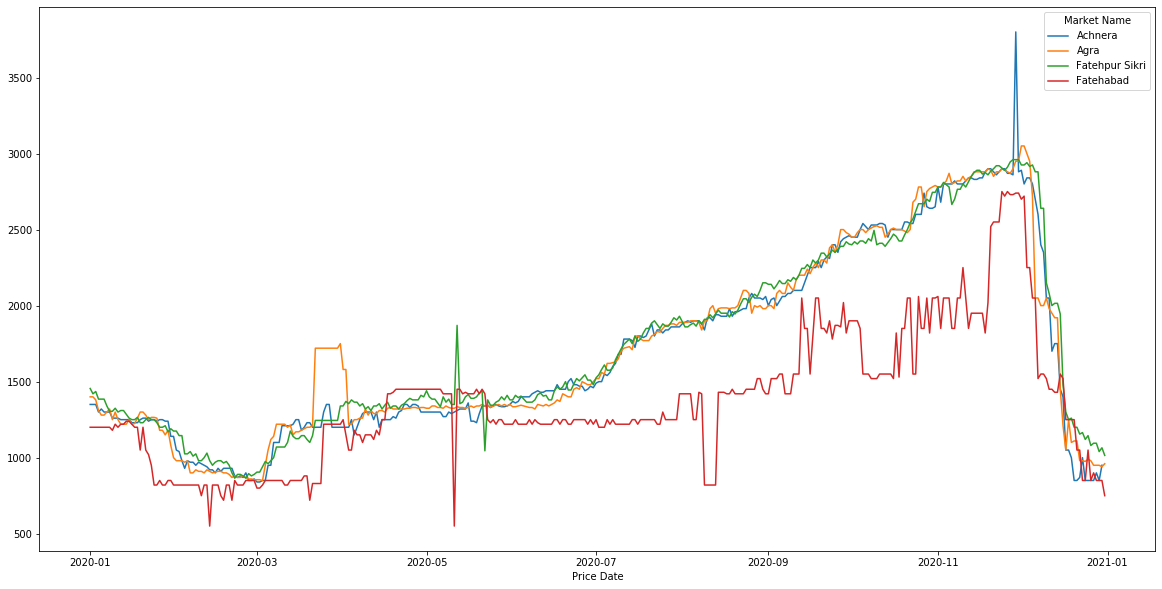

In [103]:
markets[['Achnera', 'Agra', 'Fatehpur Sikri', 'Fatehabad']].plot(kind = 'line', figsize=(20, 10))